In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')  # stopwords are insignificant words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# DATA PRE-PROCESSING

In [4]:
df = pd.read_csv('train.csv',header=0)

In [5]:
df.shape

(20800, 5)

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df = df.fillna('')

In [9]:
df['content'] = df['title']

In [10]:
print(df['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [11]:
X = df.drop('label',axis=1)
Y = df['label']

In [12]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

### Stemming : Stemming is the process of reducing a word to its root word.

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)  # ^ means exclusion of everything except alphabets and ' ' means if there is any number then it would be replaced by a space
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
df['content'] = df['content'].apply(stemming)

In [16]:
print(df['content'])

0        hous dem aid even see comey letter jason chaff...
1          flynn hillari clinton big woman campu breitbart
2                                     truth might get fire
3                 civilian kill singl us airstrik identifi
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795            rapper trump poster child white supremaci
20796      n f l playoff schedul matchup odd new york time
20797    maci said receiv takeov approach hudson bay ne...
20798             nato russia hold parallel exercis balkan
20799                                          keep f aliv
Name: content, Length: 20800, dtype: object


In [17]:
X = df['content'].values
Y = df['label'].values

In [18]:
print(X)
print(Y)

['hous dem aid even see comey letter jason chaffetz tweet'
 'flynn hillari clinton big woman campu breitbart' 'truth might get fire'
 ... 'maci said receiv takeov approach hudson bay new york time'
 'nato russia hold parallel exercis balkan' 'keep f aliv']
[1 0 1 ... 0 1 1]


### Tfidf vectorizer converts all the textual data to numerical data or vectors
### Tfidf = Term Frequency Inverse Document Frequency
### Tf counts the number of times a particular word is repeating in a document so the repetition tells the model that its a very important word and it assigns a particular numerical value to that word and IDF finds the insignificant words that are repeating

In [19]:
vect = TfidfVectorizer() 
vect.fit(X)
X = vect.transform(X)

In [20]:
print(X)

  (0, 13610)	0.3204429041871619
  (0, 11663)	0.28865071055944214
  (0, 7472)	0.3286263634991149
  (0, 6751)	0.37807503658407626
  (0, 6143)	0.24709678286281997
  (0, 4394)	0.2624700707018907
  (0, 3340)	0.3043365499413147
  (0, 2578)	0.2776884546129286
  (0, 2165)	0.4135903166037093
  (0, 243)	0.3038505731698672
  (1, 14597)	0.4029069338022535
  (1, 5974)	0.255243301322185
  (1, 4874)	0.49350006801559954
  (1, 2444)	0.25583271340004526
  (1, 1946)	0.5127916215485694
  (1, 1650)	0.21311459271319796
  (1, 1313)	0.3938922297906677
  (2, 13543)	0.520272613528009
  (2, 8285)	0.5879029381082882
  (2, 5278)	0.41416349493213955
  (2, 4770)	0.460603020443823
  (3, 13947)	0.2910988442735044
  (3, 12016)	0.4595551330231538
  (3, 7080)	0.3129596268768328
  (3, 6271)	0.48520717569885846
  :	:
  (20796, 14760)	0.12072790494289075
  (20796, 13246)	0.11914995894745603
  (20796, 11529)	0.4694159922014375
  (20796, 9959)	0.4804399319541416
  (20796, 9158)	0.4804399319541416
  (20796, 8881)	0.11669800295

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

# LOGISTIC REGRESSION

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train,Y_train)

LogisticRegression()

In [24]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction,Y_train)

In [25]:
print('Accuracy Score of training data : ',training_accuracy)

Accuracy Score of training data :  0.9399038461538461


In [26]:
X_test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction,Y_test)

In [27]:
print('Accuracy Score of testing data : ',testing_accuracy)

Accuracy Score of testing data :  0.9298076923076923


In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2077
           1       0.89      0.99      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.94      0.93      0.93      4160
weighted avg       0.94      0.93      0.93      4160



In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,X_test_prediction))

[[1811  266]
 [  26 2057]]


Text(0.5, 1.0, 'CONFUSION MATRIX FOR LOGISTIC REGRESSION')

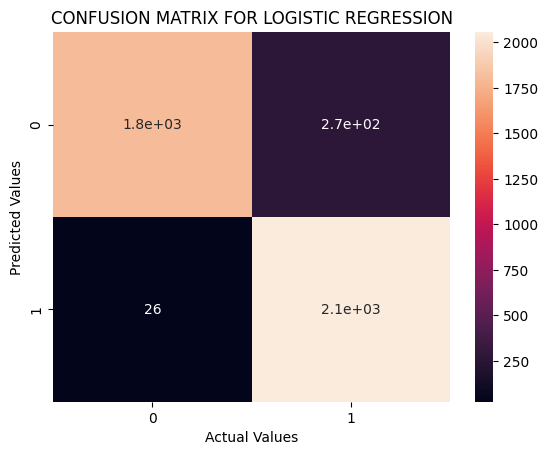

In [30]:
sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION')

# PREDICTIVE SYSTEM

In [31]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == 0):
    print('The news is real')
else:
    print('The news is fake')

[0]
The news is real


In [32]:
print(Y_test[3])

0


In [34]:
import pickle
pickle.dump(vect,open('vector.pkl','wb'))
pickle.dump(model,open('news_model.pkl','wb'))